#Feature selection

Filter methods
- Chi squared test
- information gain
- correlation coefficient

Wrapper methods
- score accuracy and compare sets of features
    - methodic: best-first search
        - ([SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html))
    - stochastic: hill-climbing algorithm
    - heuristic: forward and backward passes to remove features (example of this (?): [Recursive feature elimination](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html))

Embedded methods
- Regularization (penalize features for not adding value)
    - [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
    - [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)
    - [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

#Process
To prevent overfitting, **we can't let any information about the full dataset leak into cross-validation**. => Re-select good features in each cross-validation iteration.<br>
Feature selection should be done after model selection. 

#Example

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

In [32]:
### create data
def hidden_model(x):
    #y is a linear combination of columns 5 and 10...
    result = x[:, 5] + x[:, 10]
    #... with a little noise
    result += np.random.normal(0, .005, result.shape)
    return result
    
    
def make_x(nobs):
    return np.random.uniform(0, 3, (nobs, 10 ** 6))

x = make_x(20)
y = hidden_model(x)

In every cross-validation (KFold) iteration we select the new best features. Then we fit to the classifier:

1000000
1000000
1000000
1000000
1000000
('CV Score (R_square) is', -0.8086468631816246)


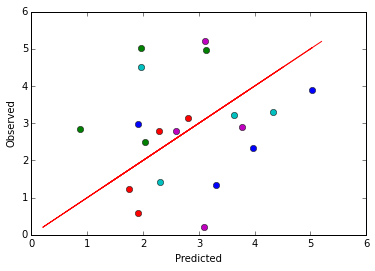

In [42]:
scores = []
clf = LinearRegression()

for train, test in KFold(len(y), n_folds=5):
    xtrain, xtest, ytrain, ytest = x[train], x[test], y[train], y[test]
    
    b = SelectKBest(f_regression, k=2)
    b.fit(xtrain,ytrain)
    xtrain = xtrain[:, b.get_support()] #get_support: get mask or integer index of selected features
    xtest = xtest[:, b.get_support()]
    print len(b.get_support())
    
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest, ytest))
    
    yp = clf.predict(xtest)
    plt.plot(yp, ytest, 'o')
    plt.plot(ytest, ytest, 'r-')

plt.xlabel('Predicted')
plt.ylabel('Observed')

print("CV Score (R_square) is", np.mean(scores))

In [43]:
print xtest
len(b.get_support())
#[count for count, x in enumerate(b.get_support()) if x == False]

[[ 1.68834822  2.48545872]
 [ 1.60874795  1.23314639]
 [ 0.05952373  0.53748066]
 [ 1.93519275  2.01535737]]


1000000

In [21]:
clf.coef_

array([-1.01187097,  0.62747674])

1. Do you have **domain knowledge**? If yes, construct a better set of **ad hoc** features
2. Are your features **commensurate**? If no, consider **normalizing** them.
3. Do you suspect interdependence of features? If yes, expand your feature set by constructing conjunctive features or products of features, as much as your computer resources allow you.
4. Do you need to prune the input variables (e.g. for cost, speed or data understanding reasons)? If no, construct disjunctive features or weighted sums of feature
5. Do you need to assess features individually (e.g. to understand their influence on the system or because their number is so large that you need to do a first filtering)? If yes, use a variable ranking method; else, do it anyway to get baseline results.
6. Do you need a predictor? If no, stop
7. Do you suspect your data is “dirty” (has a few meaningless input patterns and/or noisy outputs or wrong class labels)? If yes, detect the outlier examples using the top ranking variables obtained in step 5 as representation; check and/or discard them. <font color='grey'>(Detecting outliers with highest impact features)</font>
8. Do you know what to try first? If no, use a linear predictor. Use a forward selection method with the “probe” method as a stopping criterion or use the 0-norm embedded method for comparison, following the ranking of step 5, construct a sequence of predictors of same nature using increasing subsets of features. Can you match or improve performance with a smaller subset? If yes, try a non-linear predictor with that subset.
9. Do you have new ideas, time, computational resources, and enough examples? If yes, compare several feature selection methods, including your new idea, correlation coefficients, backward selection and embedded methods. Use linear and non-linear predictors. Select the best approach with model selection
10. Do you want a stable solution (to improve performance and/or understanding)? If yes, subsample your data and redo your analysis for several “bootstrap”.

[Useful links](http://machinelearningmastery.com/an-introduction-to-feature-selection/)